In [14]:
# Importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("Airline_Review.csv")

In [3]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure
...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes


In [4]:
# Printing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3580 non-null   object 
 1   Flying_month    2815 non-null   object 
 2   Route           2816 non-null   object 
 3   Rating          3575 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3580 non-null   object 
 6   Review_content  3580 non-null   object 
 7   Traveller_type  3580 non-null   object 
 8   Class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


In [5]:
df.shape

(3580, 9)

In [6]:
# Statistical summary for numerical columns
numerical_summary = df.describe()
print("Statistical Summary for Numerical Columns:\n")
numerical_summary

Statistical Summary for Numerical Columns:



,Rating
count,3575.000000
mean,4.790490
std,3.170323
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


In [7]:
# Statistical summary for categorical columns
categorical_summary = df.describe(include=['object'])
print("\nStatistical Summary for Categorical Columns:\n")
categorical_summary


Statistical Summary for Categorical Columns:



,Passanger_Name,Flying_month,Route,Verified,Review_title,Review_content,Traveller_type,Class
count,3580,2815,2816,1270,3580,3580,3580,3579
unique,2764,1174,744,2,2570,3506,203,13
top,David Ellis,Aug-15,Economy Class,Trip Verified,British Airways customer review,I really do not have the energy to write very ...,A320,Economy Class
freq,44,25,846,1067,952,2,342,676


In [8]:
# Checking if there are any null values in the dataset
df.isnull().sum()

Passanger_Name       0
Flying_month       765
Route              764
Rating               5
Verified          2310
Review_title         0
Review_content       0
Traveller_type       0
Class                1
dtype: int64

**Handling missing values in the dataset**

In [9]:
# Drop rows with missing values in 'Flying_month' and 'Route' columns
df.dropna(subset=['Flying_month', 'Route'], inplace=True)

In [10]:
# Impute missing values in 'Rating' column with median
median_rating = df['Rating'].median()
df['Rating'].fillna(median_rating, inplace=True)

In [11]:
# Impute missing value in 'Class' column with most frequent class
most_frequent_class = df['Class'].mode()[0]
df['Class'].fillna(most_frequent_class, inplace=True)

In [12]:
# Replace missing values in 'Verified' column with 'Unknown'
df['Verified'].fillna('Unknown', inplace=True)

In [13]:
# Again checking for null values in the dataset
df.isnull().sum()

Passanger_Name    0
Flying_month      0
Route             0
Rating            0
Verified          0
Review_title      0
Review_content    0
Traveller_type    0
Class             0
dtype: int64

In [98]:
# Assuming df is your DataFrame containing the dataset
unique_values = df['Class'].unique()
unique_count = df['Class'].nunique()

print(f"Number of unique values in 'Class' column: {unique_count}")
print(f"Unique values in 'Class' column: {unique_values}")

Number of unique values in 'Class' column: 11
Unique values in 'Class' column: ['Economy Class' 'Business Class' 'Solo Leisure' 'Family Leisure'
 'Business' 'Couple Leisure' 'Premium Economy' 'London to Malaga'
 'First Class' 'LHR to ORD' 'Los Angeles to London to Paris to Rome ']


In [99]:
# Assuming df is your DataFrame containing the dataset
df['Class'] = df['Class'].replace('Business', 'Business Class')

In [100]:
# Define target column
target_column = 'Class'  # Replace with your actual target column name

# Define numerical and categorical features
numerical_features = ['Rating']  # Adjust based on your actual numerical columns
categorical_features = [
    'Passanger_Name', 'Flying_month', 'Route', 'Verified',
    'Review_title', 'Review_content', 'Traveller_type',
]

In [101]:
# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical variables
    ])

In [102]:
# Split the dataset into training and testing sets
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

In [103]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
# Step 5: Preprocess data using the defined preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**Research Questions Analysis**

**Q1. What is overall distribution of customer satisfaction ratings for flights in the dataset?**

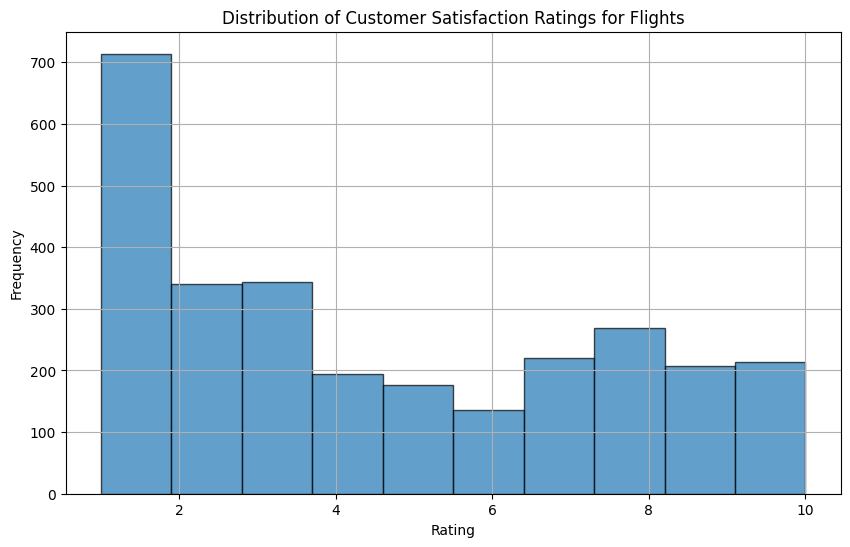

In [65]:
# Plotting the distribution of customer satisfaction ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Customer Satisfaction Ratings for Flights')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<ipython-input-69-76951d61f1ce>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Flying_month', y='Rating', data=df, ci=None)


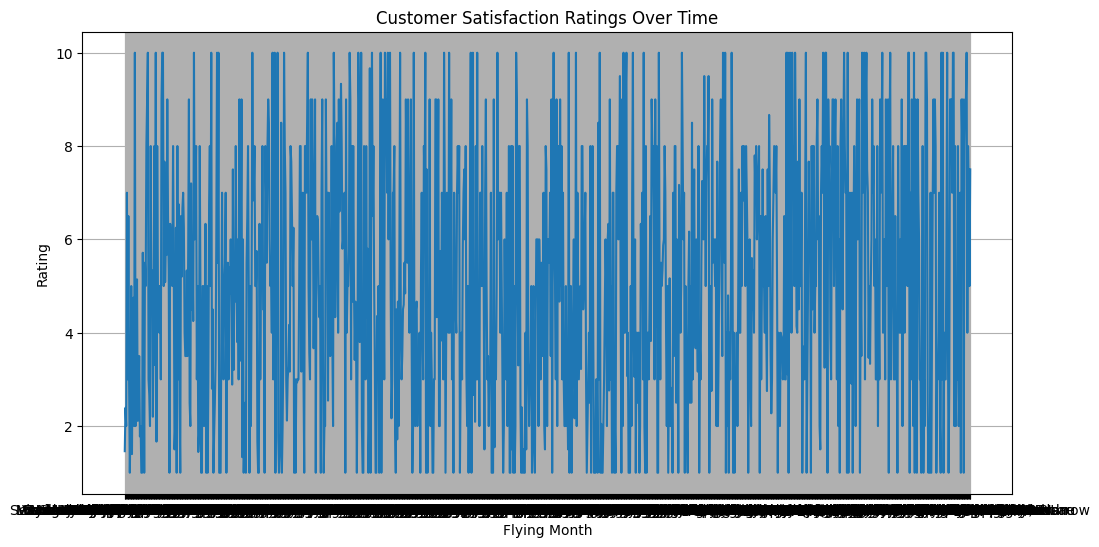

In [69]:
# Line plot of ratings over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Flying_month', y='Rating', data=df, ci=None)
plt.title('Customer Satisfaction Ratings Over Time')
plt.xlabel('Flying Month')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

**Q2. How do different travel routes affect customer satisfaction ratings?**

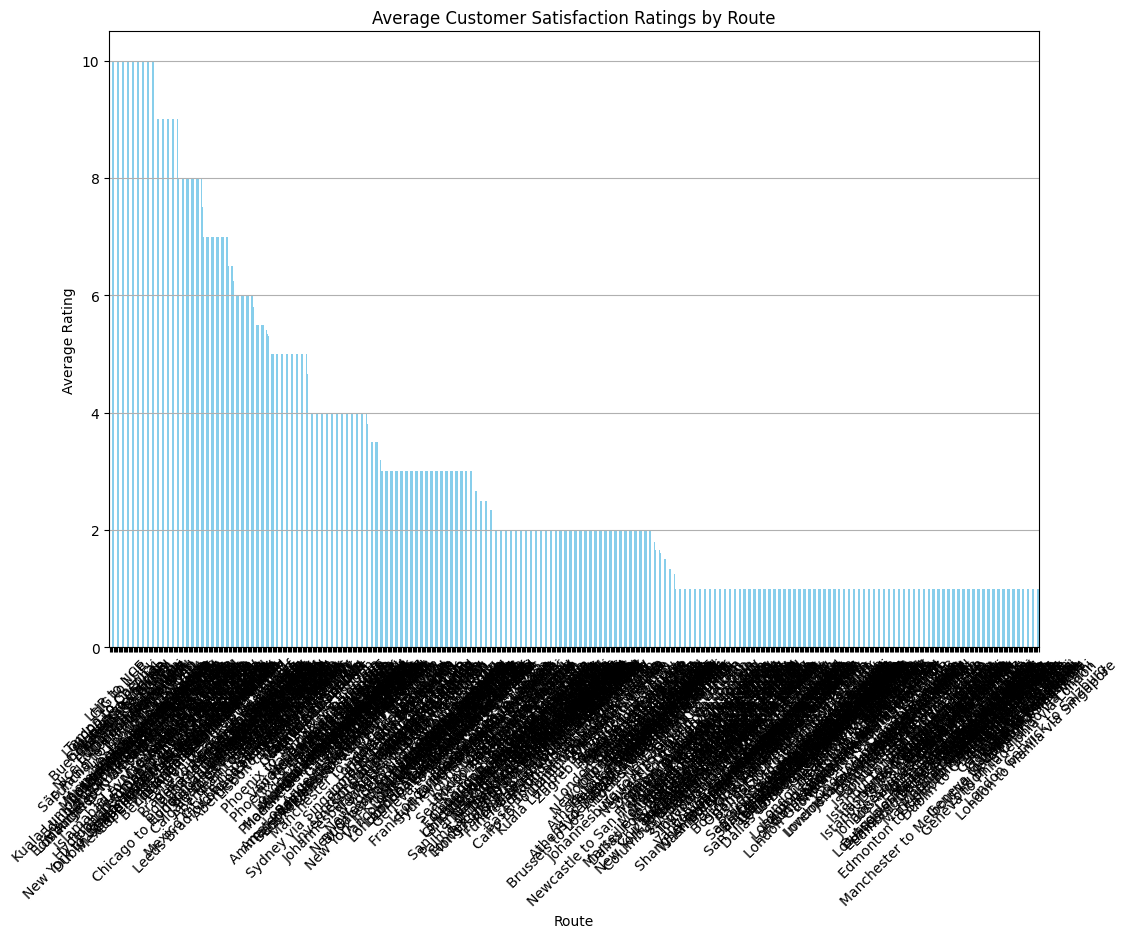

In [73]:
# Calculate average ratings per route
avg_ratings = df.groupby('Route')['Rating'].mean().sort_values(ascending=False)

# Bar plot of average ratings by route
plt.figure(figsize=(12, 8))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Customer Satisfaction Ratings by Route')
plt.xlabel('Route')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<ipython-input-74-ff5e7742e06e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating', y='Route', data=df, palette='muted', inner='quartile')


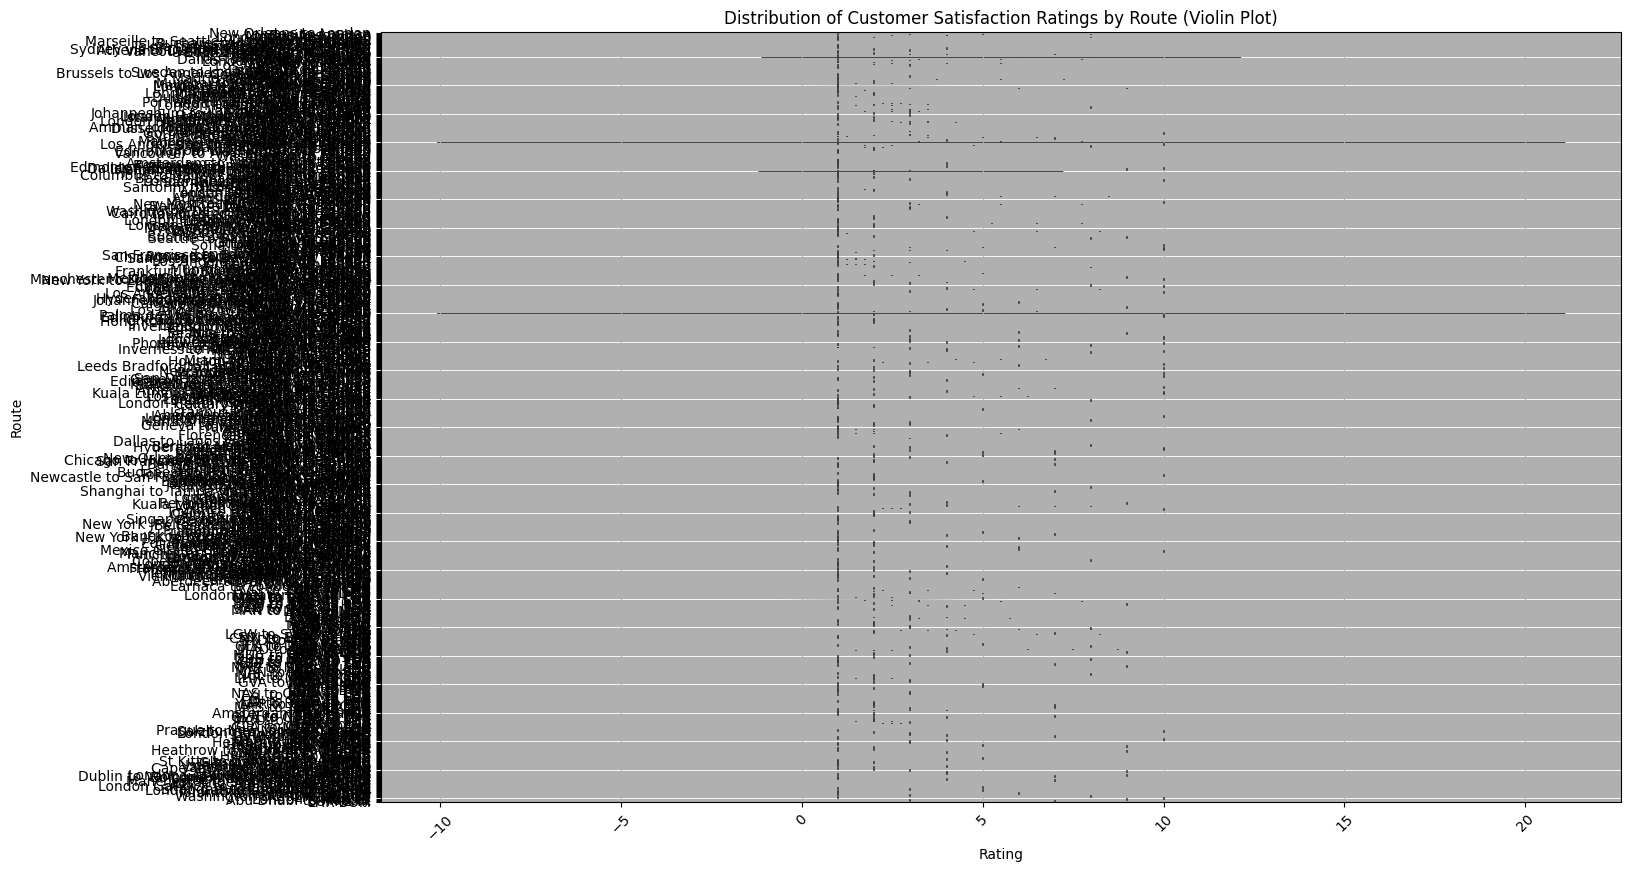

In [74]:
# Violin plots for each route
plt.figure(figsize=(16, 10))
sns.violinplot(x='Rating', y='Route', data=df, palette='muted', inner='quartile')
plt.title('Distribution of Customer Satisfaction Ratings by Route (Violin Plot)')
plt.xlabel('Rating')
plt.ylabel('Route')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-75-961730fba0a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Route', data=df, palette='muted')


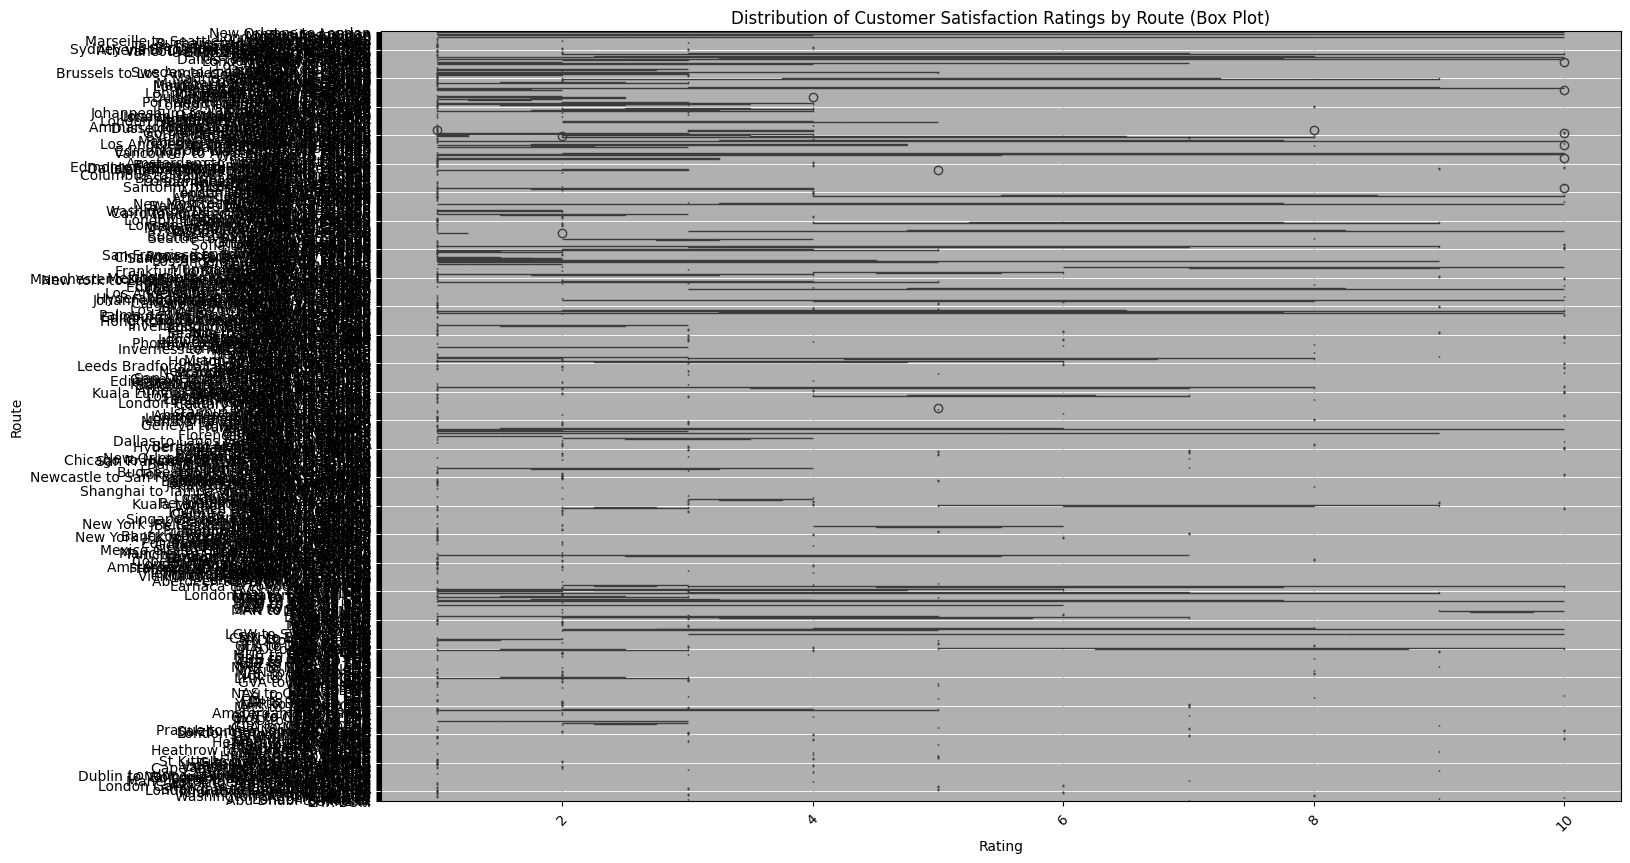

In [75]:
# Box plots for each route
plt.figure(figsize=(16, 10))
sns.boxplot(x='Rating', y='Route', data=df, palette='muted')
plt.title('Distribution of Customer Satisfaction Ratings by Route (Box Plot)')
plt.xlabel('Rating')
plt.ylabel('Route')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Q3. What impact do specific service issues have on customer satisfaction?**

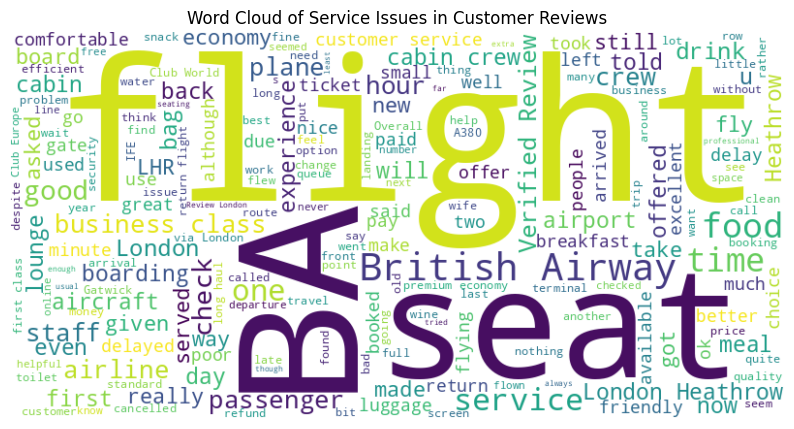

In [76]:
from wordcloud import WordCloud

# Concatenate all review content into a single string
all_reviews = ' '.join(df['Review_content'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Service Issues in Customer Reviews')
plt.axis('off')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-79-321d71e9ce1d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(issues), palette='viridis')


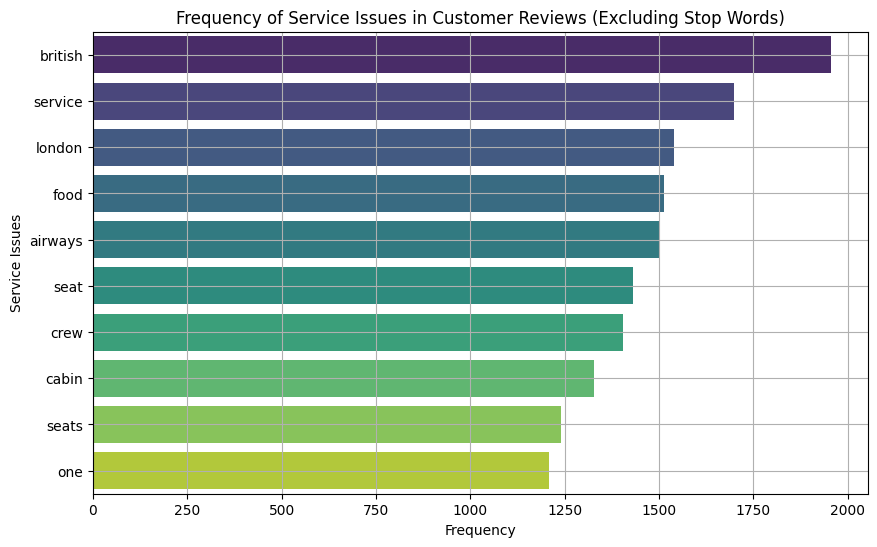

In [79]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Define custom stop words
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['flight', 'airline', 'airlines', 'plane', 'planes', 'airport', 'aircraft'])

# Tokenize and count the most common service issues, excluding stop words
service_issues = ' '.join(df['Review_content'].dropna()).lower().split()
filtered_issues = [word for word in service_issues if word not in custom_stopwords and len(word) > 2]  # Filter out stop words and short words
service_issues_counts = Counter(filtered_issues).most_common(10)

# Extract service issues and counts
issues, counts = zip(*service_issues_counts)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(issues), palette='viridis')
plt.title('Frequency of Service Issues in Customer Reviews (Excluding Stop Words)')
plt.xlabel('Frequency')
plt.ylabel('Service Issues')
plt.grid(True)
plt.show()


<ipython-input-80-736847855220>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y=df['Review_content'].apply(lambda x: next((issue for issue in issues if issue in str(x).lower() and issue not in custom_stopwords), 'Other')), data=df, palette='muted')


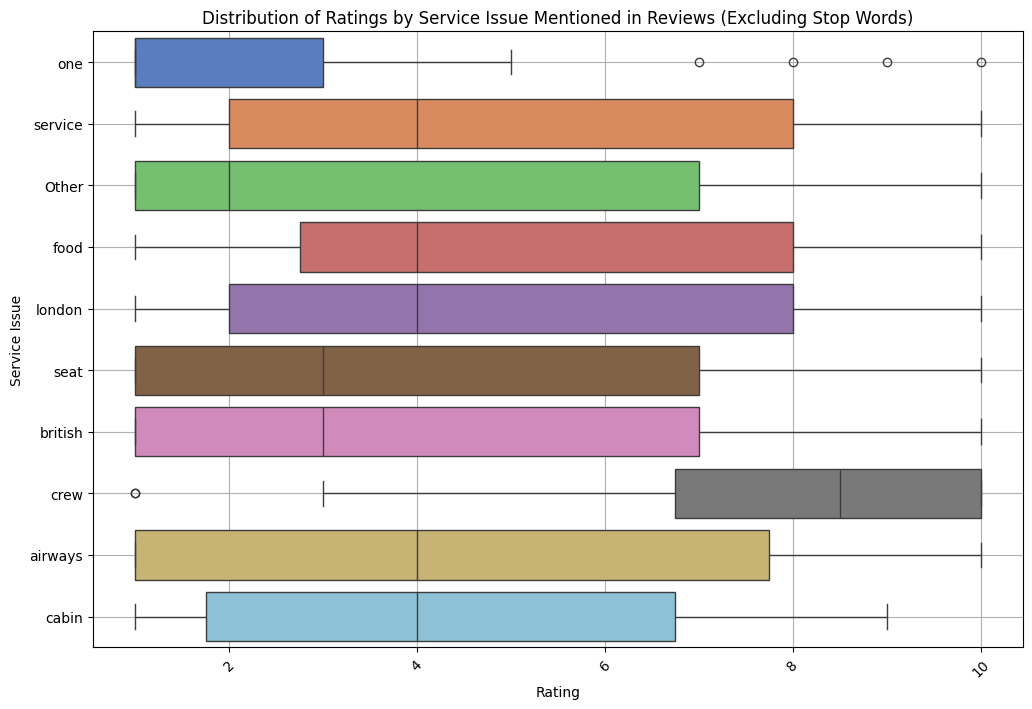

In [80]:
# Define a function to filter ratings by service issue excluding stop words
def ratings_by_issue(issue):
    return df[df['Review_content'].str.lower().str.contains(issue)]['Rating']

# Plot box plots for each service issue excluding stop words
plt.figure(figsize=(12, 8))
sns.boxplot(x='Rating', y=df['Review_content'].apply(lambda x: next((issue for issue in issues if issue in str(x).lower() and issue not in custom_stopwords), 'Other')), data=df, palette='muted')
plt.title('Distribution of Ratings by Service Issue Mentioned in Reviews (Excluding Stop Words)')
plt.xlabel('Rating')
plt.ylabel('Service Issue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Q4. Are there differences in customer satisfaction based on the travel class?**

<ipython-input-108-4967de038f77>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Rating', data=df, order=['Economy Class', 'Business Class', 'First Class', 'Solo Leisure', 'Family Leisure', 'Couple Leisure', 'Premium Economy' ], palette='Set2')


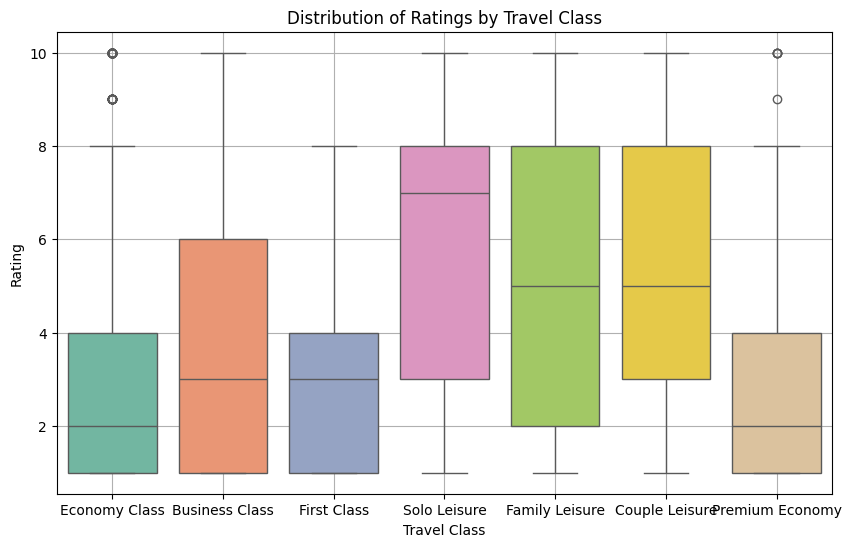

In [108]:
# Box plot of ratings by travel class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Rating', data=df, order=['Economy Class', 'Business Class', 'First Class', 'Solo Leisure', 'Family Leisure', 'Couple Leisure', 'Premium Economy' ], palette='Set2')
plt.title('Distribution of Ratings by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


<ipython-input-109-505cabce3c91>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='pastel')


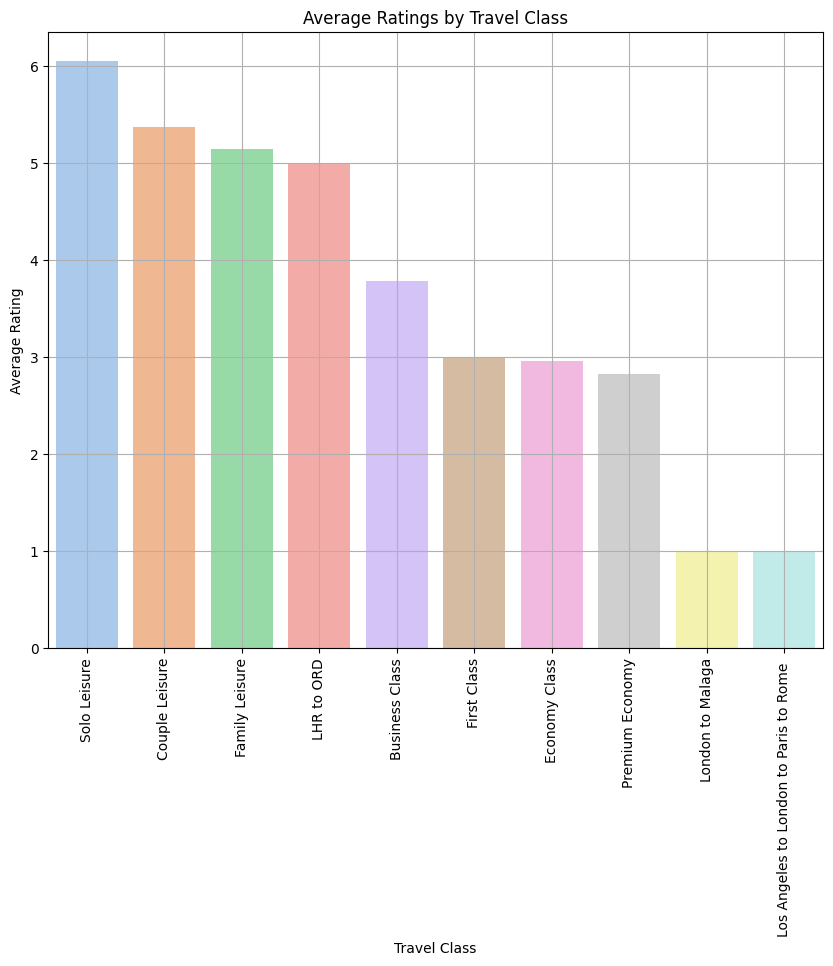

In [109]:
# Bar plot of average ratings by travel class
avg_ratings = df.groupby('Class')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='pastel')
plt.title('Average Ratings by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


Hypothesis: Passengers traveling in Business Class will have significantly higher satisfaction ratings compared to those traveling in Economy Class.

Null and Alternate Hypothesis:
Null Hypothesis(H0): There is no significant difference in customer satisfaction ratings between passengers traveling in Business Class and those traveling in Economy Class.

Alternate Hypothesis(H1): Passengers traveling in Business Class have significantly higher satisfaction ratings compared to those traveling in Economy Class.

In [110]:
# Filter ratings for Business Class and Economy Class
business_ratings = df[df['Class'] == 'Business Class']['Rating']
economy_ratings = df[df['Class'] == 'Economy Class']['Rating']

In [111]:
business_ratings

1       1.0
6       1.0
10      2.0
14      1.0
19      1.0
       ... 
2807    4.0
2809    8.0
2811    7.0
2812    5.0
2814    7.0
Name: Rating, Length: 613, dtype: float64

In [112]:
economy_ratings

0        1.0
3        4.0
5        1.0
8        1.0
9        1.0
        ... 
2773     1.0
2778     3.0
2779     4.0
2798    10.0
2799     9.0
Name: Rating, Length: 675, dtype: float64

In [113]:
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(business_ratings, economy_ratings, equal_var=False)

In [114]:
# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: 5.247564645262025
P-Value: 1.8032474015486156e-07


In [115]:
# Interpret the results
alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence that passengers traveling in Business Class have higher satisfaction ratings compared to Economy Class.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that passengers traveling in Business Class have higher satisfaction ratings compared to Economy Class.")


Reject the null hypothesis. There is significant evidence that passengers traveling in Business Class have higher satisfaction ratings compared to Economy Class.
